In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [18]:

theta = np.array([np.pi/15, -np.pi/3, np.pi/3])
Sigma = np.diag([3, 1, 0.5])


In [19]:
Rx = np.array([
    [1, 0, 0],
    [0, np.cos(theta[0]), -np.sin(theta[0])],
    [0, np.sin(theta[0]), np.cos(theta[0])]
])

Ry = np.array([
    [np.cos(theta[1]), 0, np.sin(theta[1])],
    [0, 1, 0],
    [-np.sin(theta[1]), 0, np.cos(theta[1])]
])

Rz = np.array([
    [np.cos(theta[2]), -np.sin(theta[2]), 0],
    [np.sin(theta[2]), np.cos(theta[2]), 0],
    [0, 0, 1]
])



In [20]:
X = Rz @ Ry @ Rx @ Sigma


In [21]:
X

array([[ 0.75      , -0.93712907, -0.12174676],
       [ 1.29903811,  0.33314003, -0.41878327],
       [ 2.59807621,  0.10395585,  0.2445369 ]])

In [22]:
xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):

        vec = [x[i, j], y[i, j], z[i, j]]
        vecR = X@ vec
        xR[i, j] = vecR[0]
        yR[i, j] = vecR[1]
        zR[i, j] = vecR[2]



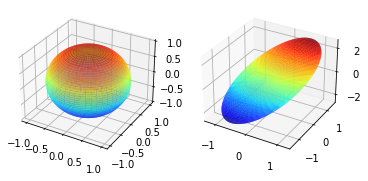

In [37]:
# plot sphere
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# plot the surfaces
surf1 = ax.plot_surface(x, y, z, cmap='jet', alpha=0.7)
am2 = fig.add_subplot(122, projection='3d')
surf2 = am2.plot_surface(xR, yR, zR, cmap='jet', alpha=0.7)
plt.show()


In [57]:
U, S, V_t = np.linalg.svd(X, full_matrices=False)

In [51]:
X = U @ np.diag(S)

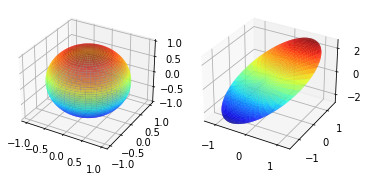

In [53]:
xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):

        vec = [x[i, j], y[i, j], z[i, j]]
        vecR = X@ vec
        xR[i, j] = vecR[0]
        yR[i, j] = vecR[1]
        zR[i, j] = vecR[2]
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# plot the surfaces
surf1 = ax.plot_surface(x, y, z, cmap='jet', alpha=0.7)
am2 = fig.add_subplot(122, projection='3d')
surf2 = am2.plot_surface(xR, yR, zR, cmap='jet', alpha=0.7)
plt.show()


In [59]:
V_t

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])